#Khagendra Khatri

In [1]:
#!pip install scipy scikit-learn matplotlib -q

In [2]:
from sklearn import datasets
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = datasets.load_iris()

x =  data.data[:,:2]
y = data.target

x

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

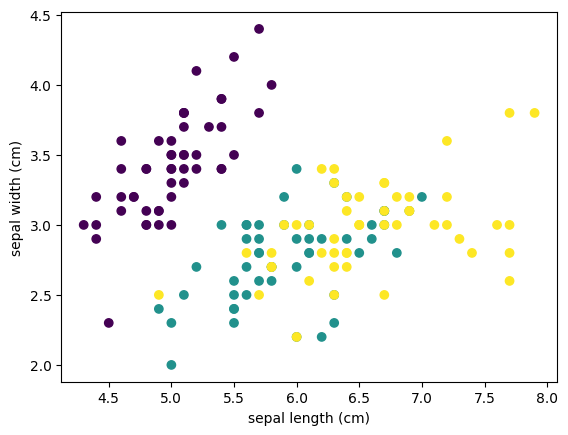

In [4]:
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.scatter(x[:,0], x[:,1], c=y)

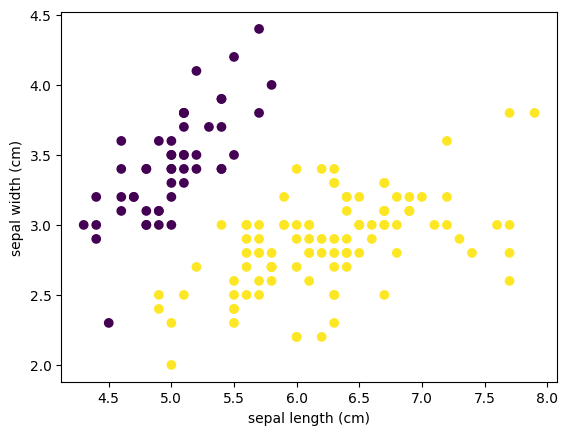

In [5]:
y = np.array(y, dtype=bool)
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.scatter(x[:,0], x[:,1], c=y)

In [ ]:
from joblib.numpy_pickle_utils import xrange
from numpy import *


class neuron(object): 
	def __init__(self): 
		# Generate random numbers 
		random.seed(1) 

		# Assign random weights to a 3 x 1 matrix, 
		self.synaptic_weights = 2 * random.random((3, 1)) - 1

	# The Sigmoid function 
	def __sigmoid(self, x): 
		return 1 / (1 + exp(-x)) 

	# The derivative of the Sigmoid function. 
	# This is the gradient of the Sigmoid curve. 
	def __sigmoid_derivative(self, x): 
		return x * (1 - x) 

	# Train the neural network and adjust the weights each time. 
	def train(self, inputs, outputs, training_iterations): 
		for iteration in xrange(training_iterations): 
			# Pass the training set through the network. 
			output = self.learn(inputs) 

			# Calculate the error 
			error = outputs - output 

			# Adjust the weights by a factor 
			factor = dot(inputs.T, error * self.__sigmoid_derivative(output)) 
			self.synaptic_weights += factor 

		# The neural network thinks. 

	def learn(self, inputs): 
		return self.__sigmoid(dot(inputs, self.synaptic_weights)) 

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, stratify=y)

In [7]:
p = Perceptron()
p.fit(x_train, y_train)


print(f"Training datat score: {p.score(x_train,y_train)}")
print(f"Training datat score: {p.score(x_test,y_test)}")

Training datat score: 0.9904761904761905
Training datat score: 1.0


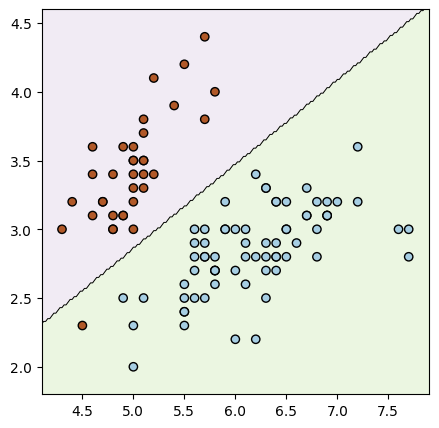

In [8]:
def plot_decision_boundary(clf, X, Y, cmap='Paired_r'):
    # make a mesh grid with a step size of 0.02
    stepSize = 0.02
    x_min, x_max = X[:,0].min() - 10*stepSize, X[:,0].max() + 10*stepSize
    y_min, y_max = X[:,1].min() - 10*stepSize, X[:,1].max() + 10*stepSize
    xx, yy = np.meshgrid(np.arange(x_min, x_max, stepSize),
                         np.arange(y_min, y_max, stepSize))
    # get model predictions for entire mesh grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # plot the contour based on modelpower predictions
    plt.figure(figsize=(5,5))
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.25)
    plt.contour(xx, yy, Z, colors='k', linewidths=0.7)
    # plot the actual data
    plt.scatter(X[:,0], X[:,1], c=Y, cmap=cmap, edgecolors='k')

plot_decision_boundary(p, x_train, y_train)